Projekt na zaliczenie przedmiotu Wprowadzenie do programowania w języku Python.

# Analiza danych twitterowych


Projekt będzie dotyczył przetworzenia i wizualizacji danych tekstowych pochodzących z serwisu twitter.com . W tym celu za pośrednictwem strony internetowej https://developer.twitter.com/en, po wcześniejszej rejestacji uzyskano "klucz konsumenta", następnie skonfigurowano połączenie API za pomocą biblioteki "tweepy". Z pomocą bibliotek pandas i re dokonano niezbędnych przekształćeń danych m.in. ich czyszczenia. Za zbadanie nacechowania tekstu odpowiadałą będzie z kolei biblioteka TextBlob. Do wizualizacji danych posłużono się matplotlib, wordcloud, seaborn. Za pomocą bibliotek pandas i re dokonano niezbędnych przekształćeń danych m.in. ich czyszczenia

# Importowanie niezbędnych bibliotek

In [1]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
plt.style.use('bmh')
import seaborn as sns
import en_core_web_sm
nlp = en_core_web_sm.load()

C:\ProgramData\Anaconda3\lib\site-packages\spacy\util.py:275: UserWarning: [W031] Model 'en_core_web_sm' (2.2.0) requires spaCy v2.2 and is incompatible with the current spaCy version (2.3.5). This may lead to unexpected results or runtime errors. To resolve this, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


# Konfiguracja połączenia

Na portalu  https://developer.twitter.com/en dokonano rejestracji oraz pozyskano poniższe klucze, który każdy z użytkowników portalu jest w stanie wygenerować poprzez rejestrację aplikacji klienckiej.

In [1]:
consumerKey = 'XXXXX'
consumerSecret = 'XXXXX'
accessToken = 'XXXXX'
accessTokenSecret = 'XXXXX'

Autoryzacja powyższych kluczy w celach konfiguracji połączenia.

In [3]:
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
authenticate.set_access_token(accessToken, accessTokenSecret) 
api = tweepy.API(authenticate, wait_on_rate_limit = True)

# Pobranie danych tekstowych 

Analizie poddano twitty Joe Biden'a nowego prezydenta Stanów Zjednoczonych. Wyszukano je za pomocą funkcji api.user_timeline z pakietu "tweepy".

In [4]:
daneTweeter = api.user_timeline(screen_name="JoeBiden", count = 200, lang ="en", tweet_mode="extended")


print("Pierwsze 10 tweet'ow :\n")
i=1
for tweet in daneTweeter[:10]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Pierwsze 10 tweet'ow :

1) RT @POTUS: Let me be clear: No one should lose their home in the middle of this pandemic. Congress needs to pass the American Rescue Plan t…

2) RT @POTUS: We can’t stand by as millions of Americans struggle to put food on the table. Congress needs to immediately pass the American Re…

3) RT @POTUS: There’s so much more work to be done, but we’ve been able to increase vaccine distribution by 28% in the first three weeks alone…

4) RT @POTUS: Launching a national vaccination program to quickly and equitably vaccinate America — that’s the American Rescue Plan. https://t…

5) RT @POTUS: Making vaccines free and accessible for every American — that’s the American Rescue Plan. https://t.co/5GpH0VYWIE

6) RT @POTUS: We don’t have a second to waste when it comes to delivering the American people the relief they desperately need. I’m calling on…

7) RT @POTUS: For your family, for your neighbors, for your country — wear a mask.

8) RT @POTUS: Everyone who wants a vac

In [5]:
danedfTweeter = pd.DataFrame([tweet.full_text for tweet in daneTweeter], columns=['Tweets'])
danedfTweeter

,Tweets
0,RT @POTUS: Let me be clear: No one should lose...
1,RT @POTUS: We can’t stand by as millions of Am...
2,RT @POTUS: There’s so much more work to be don...
3,RT @POTUS: Launching a national vaccination pr...
4,RT @POTUS: Making vaccines free and accessible...
...,...
195,"When I think of climate change, I think about ..."
196,"In this battle for the soul of America, democr..."
197,.@KamalaHarris and I are building a historic C...
198,.@PeteButtigieg has the perspective of a mayor...


# Czyszczenie danych

Najpierw usunięte zostaną stopwords dwukrotnie, raz z pomocą biblioteki "nltk" oraz ponownie z pomocą biblioteki "sklearn", czyli wyrazy o małym znaczeniu np. spójniki oraz słowa popularne, które niewpływają na identyfikację dokumentu. Następnie z wykorzystanie funkcji re.sub z biblioteki "re" oczyszczono dane za pomocą zdefiniowanej funkcji ze zbędnych znaków, takich jak liczby, znaki interpunkcyjne, hiperlinki itd.

In [6]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

danedfTweeter['Tweets'] = danedfTweeter['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


from sklearn.feature_extraction import text
stop = text.ENGLISH_STOP_WORDS


danedfTweeter['Tweets'] = danedfTweeter['Tweets'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))



def CzyszczenieDanych(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) 
 text = re.sub('#', '', text) 
 text = re.sub('RT[\s]+', '', text) 
 text = re.sub('https?:\/\/\S+', '', text)
 text = re.sub('[^a-zA-Z0-9 \n\.]', '', text)
 text = re.sub("^\s+","",text)
 text = re.sub("\s+\Z","",text)  
 text = re.sub("\d+", "", text)
 text = re.sub(r"^\s+", "", text)
 text = text.strip()
 text = re.sub("\\n","",text)
 text = re.sub('\.(?!(\S[^. ])|\d)', '', text)
    
 return text

# czyszczenie twittow
danedfTweeter['Tweets'] = danedfTweeter['Tweets'].apply(CzyszczenieDanych)
danedfTweeter['Tweets']=danedfTweeter['Tweets'].replace(to_replace='I', value="",regex=True)
danedfTweeter['Tweets']=danedfTweeter['Tweets'].replace(to_replace='We', value="",regex=True)
danedfTweeter['Tweets']=danedfTweeter['Tweets'].replace(to_replace='The', value="",regex=True)

# wyczyszczone
danedfTweeter['Tweets']

0      Let clear No lose home middle pandemic Congres...
1       cant stand millions Americans struggle food t...
2      res work done weve able increase vaccine distr...
3      Launching national vaccination program quickly...
4      Making vaccines free accessible American  that...
                             ...                        
195    When  think climate change  think jobs Goodpay...
196            n battle soul America democracy prevailed
197      building historic Cabinet A Cabinet looks li...
198     perspective mayor solves problems brings peop...
199    As tough moment country dark days winter seem ...
Name: Tweets, Length: 200, dtype: object

# Wstępna wizualizacja oczyszczonych danych

Chmura tekstu z wyrazami, które występują najczęściej w twitach związanych z Joe Biden'em.

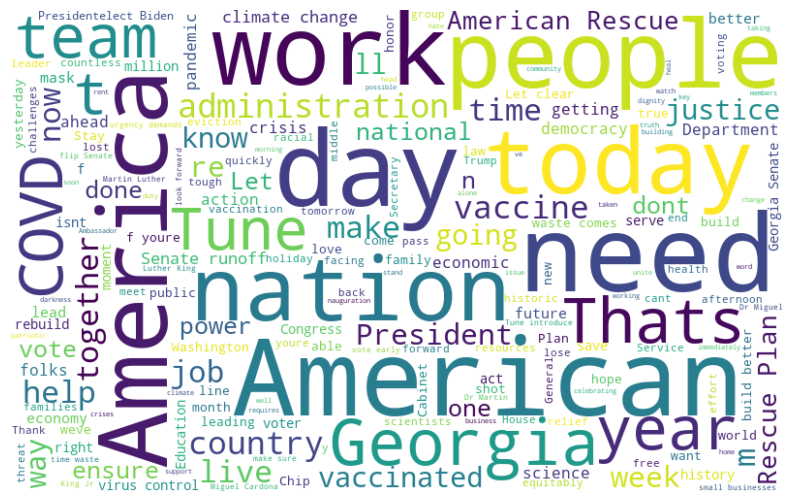

In [7]:
Words = ' '.join([twts for twts in danedfTweeter['Tweets']])
wordCloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color="white").generate(Words)

plt.figure(figsize=(10, 10)) 
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

Chmura tekstu w kształcie logo serwisu twitter.

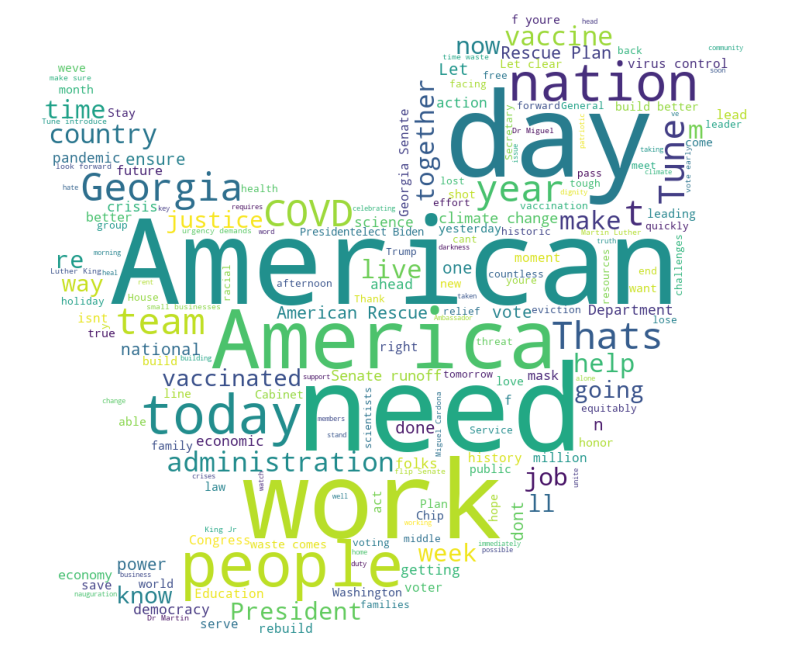

In [8]:
from imageio import imread

twitter_mask = imread('./twitter_mask.png')

wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='white',
                      width=800,
                      height=500,
                      mask=twitter_mask
            ).generate(Words)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig('./my_twitter_wordcloud_2.png', dpi=1000)
plt.show()

# Badanie nacechowania z biblioteką TextBlob

Następnie z biblioteką "TextBlob" zbadano nacechowanie twittów ("polarity") oraz ich subiektywność("subjectivity"). Dla obu przypadków zdefiniowano krótkie funkcje.

In [9]:
def Subiektywnosc(text):
   return TextBlob(text).sentiment.subjectivity

def Nacechowanie(text):
   return  TextBlob(text).sentiment.polarity

danedfTweeter['Subjectivity'] = danedfTweeter['Tweets'].apply(Subiektywnosc)
danedfTweeter['Polarity'] = danedfTweeter['Tweets'].apply(Nacechowanie)

Kolejna z funkcji na podstawie parametru polarity, będzie określała nacechowanie danych twittów. Jeżeli parametr polarity jest mniejszy od zera, oznacza to, że tekst ma nacechowanie negatywne, wartość zerowa świadczy o neutralności przekazu, wartość dodatnia to z kolei oznaka pozytywnego nacechowania. 

In [10]:
def rate(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
danedfTweeter['Analysis'] = danedfTweeter['Polarity'].apply(rate)
danedfTweeter

,Tweets,Subjectivity,Polarity,Analysis
0,Let clear No lose home middle pandemic Congres...,0.127778,0.033333,Positive
1,cant stand millions Americans struggle food t...,0.000000,0.000000,Neutral
2,res work done weve able increase vaccine distr...,0.625000,0.500000,Positive
3,Launching national vaccination program quickly...,0.250000,0.166667,Positive
4,Making vaccines free accessible American that...,0.293750,0.193750,Positive
...,...,...,...,...
195,When think climate change think jobs Goodpay...,0.000000,0.000000,Neutral
196,n battle soul America democracy prevailed,0.000000,0.000000,Neutral
197,building historic Cabinet A Cabinet looks li...,0.150000,0.500000,Positive
198,perspective mayor solves problems brings peop...,0.200000,0.200000,Positive


Dwa poniższe wykresy to wordcloud'y dla twittów z nacechowaniem pozytywnym oraz negatywnym.

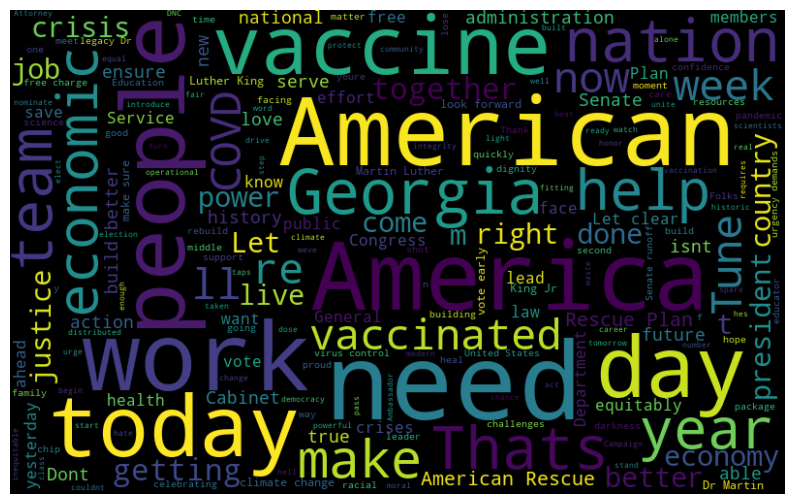

In [11]:
positive = ' '.join([text for text in danedfTweeter['Tweets'][danedfTweeter['Analysis'] == 'Positive']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

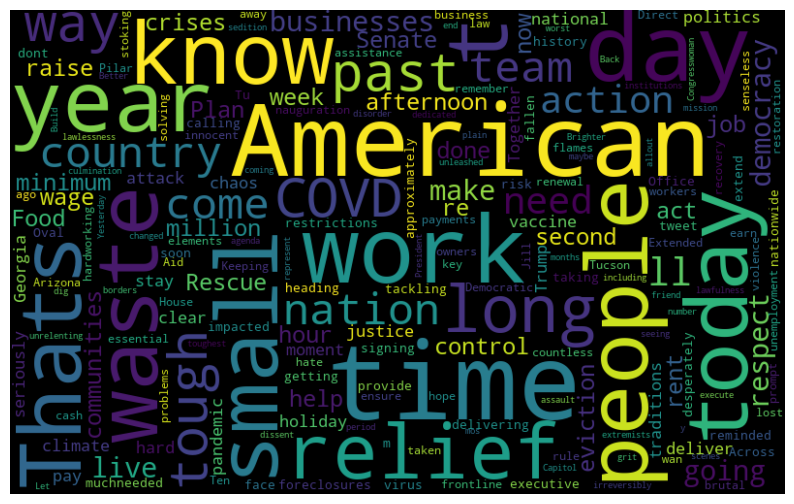

In [12]:
negative = ' '.join([text for text in danedfTweeter['Tweets'][danedfTweeter['Analysis'] == 'Negative']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

Kolejnym wykres to prosty scatterplot, gdzie na osi X umieszczono zmienną polarity, zaś dla osi Y jest to zmienna subjectivity.

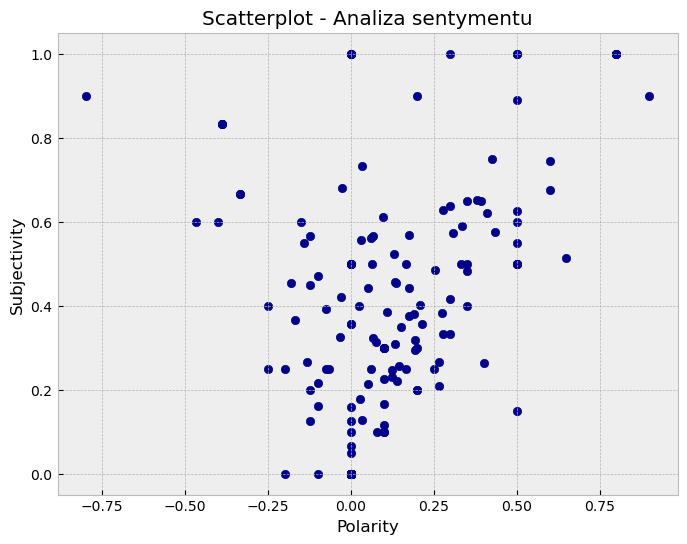

In [13]:
plt.figure(figsize=(8,6)) 
for i in range(0, danedfTweeter.shape[0]):
  plt.scatter(danedfTweeter["Polarity"][i], danedfTweeter["Subjectivity"][i], color='Darkblue')   
plt.title('Scatterplot - Analiza sentymentu') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

Poniżej tzw. barplot pokazujący rozklad ilości twittów w zależności od ich nacechowania.

In [14]:
danedfTweeter['Analysis'].value_counts()

Positive    91
Neutral     78
Negative    31
Name: Analysis, dtype: int64

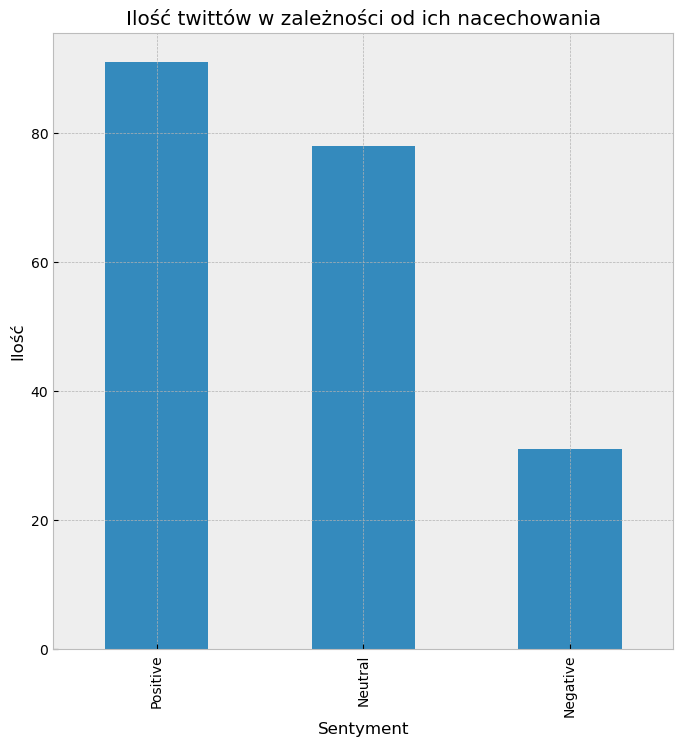

In [15]:
plt.figure(figsize=(8,8))
plt.title('Ilość twittów w zależności od ich nacechowania')
plt.xlabel('Sentyment')
plt.ylabel('Ilość')
danedfTweeter['Analysis'].value_counts().plot(kind = 'bar')
plt.show()

Tutaj z kolei na wykresie kołowym ukazany został rozkład ilości twittów w zależności od nacechowania, ale w wartościach procentowych

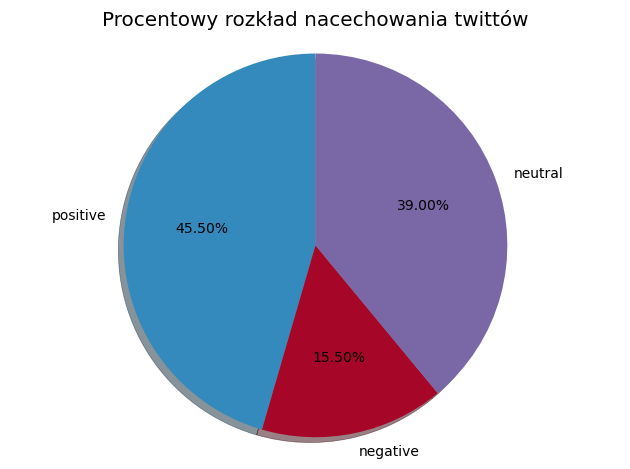

In [16]:
positive = danedfTweeter[danedfTweeter.Analysis == 'Positive']
positive = positive['Tweets']
negative = danedfTweeter[danedfTweeter.Analysis == 'Negative']
negative = negative['Tweets']
neutral = danedfTweeter[danedfTweeter.Analysis == 'Neutral']
neutral = neutral['Tweets']

positive=round( (positive.shape[0] / danedfTweeter.shape[0]) * 100 , 1)
negative=round( (negative.shape[0] / danedfTweeter.shape[0]) * 100 , 1)
neutral=round( (neutral.shape[0] / danedfTweeter.shape[0]) * 100 , 1)

labels=['positive', 'negative','neutral']
sizes=[positive,negative,neutral]
colors=['yellow',"gold","green"]
chart=plt.pie(sizes,labels=labels, startangle=90, autopct='%.2f%%',shadow=True)
plt.title("Procentowy rozkład nacechowania twittów".format("Infosys"))
plt.axis("equal")
plt.tight_layout()
plt.show()

Dodatkowo zamieszczono dwa histogramy częstości występowania poszczególnych poziomów zmiennej "Polarity" oraz "Subjectivity".

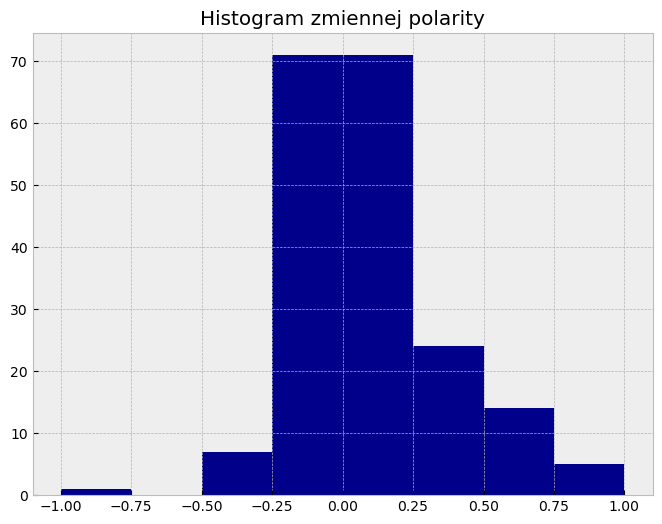

In [17]:
df_sentiment = danedfTweeter[['Tweets','Polarity']]
df_sentiment = df_sentiment[danedfTweeter.Polarity != 0]


fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram of the polarity values
df_sentiment.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="darkblue")

plt.title("Histogram zmiennej polarity")
plt.show()


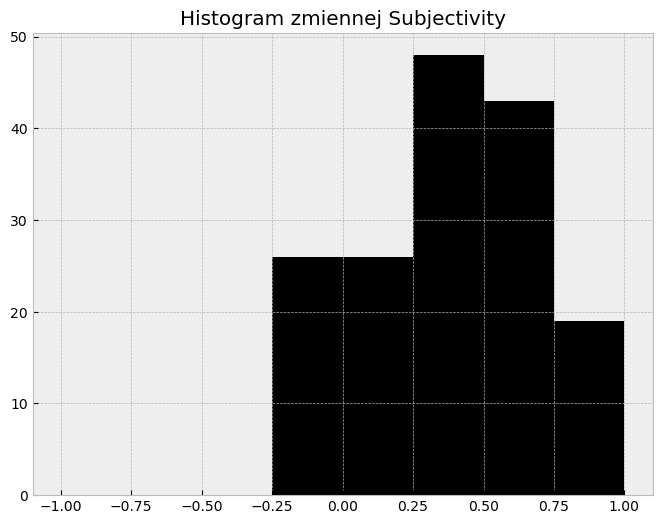

In [18]:
df_sentiment = danedfTweeter[['Tweets','Subjectivity']]
df_sentiment = df_sentiment[danedfTweeter.Subjectivity != 0]


fig, ax = plt.subplots(figsize=(8, 6))

df_sentiment.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="black")

plt.title("Histogram zmiennej Subjectivity")
plt.show()

# Wizualizacja danych dotyczących pojedynczych wyrazów występujących w twittach.

Teraz postaramy się rozdzielić pojedyncze wyrazy z twittów. Na początku tworzymy pustą listę do której będziemy wkładać poszczególne twitty z naszego data frame'u. Następnie rozdzielimy każde pojedyncze wyrazy, które będziemy wkładać do kolejnej listy.

In [19]:
set_of_tweets = []

for word in danedfTweeter['Tweets']:
    set_of_tweets.append(word)


list_of_tweets = list()
for line in set_of_tweets:    
    words = line.split()
    for w in words: 
       list_of_tweets.append(w)

print(list_of_tweets)

['Let', 'clear', 'No', 'lose', 'home', 'middle', 'pandemic', 'Congress', 'needs', 'pass', 'American', 'Rescue', 'Plan', 't', 'cant', 'stand', 'millions', 'Americans', 'struggle', 'food', 'table', 'Congress', 'needs', 'immediately', 'pass', 'American', 'Re', 'res', 'work', 'done', 'weve', 'able', 'increase', 'vaccine', 'distribution', 'weeks', 'alone', 'Launching', 'national', 'vaccination', 'program', 'quickly', 'equitably', 'vaccinate', 'America', 'thats', 'American', 'Rescue', 'Plan', 'Making', 'vaccines', 'free', 'accessible', 'American', 'thats', 'American', 'Rescue', 'Plan', 'dont', 'second', 'waste', 'comes', 'delivering', 'American', 'people', 'relief', 'desperately', 'need', 'm', 'calling', 'on', 'For', 'family', 'neighbors', 'country', 'wear', 'mask', 'Everyone', 'wants', 'vaccine', 'able', 'free', 'charge', 'American', 'Rescue', 'Plan', 'make', 'reality', 'Last', 'year', 'Michele', 'lost', 'job', 'pandemic', 'recently', 'gave', 'hear', 'story', 'discuss', 'America', 'This', '

Teraz usuniemy zbędne spacje pomiędzy wyrazami.

In [20]:
list_of_tweets_2 = []
for word in list_of_tweets:
    if word != '':
        list_of_tweets_2.append(word)
list_of_tweets_2

['Let',
 'clear',
 'No',
 'lose',
 'home',
 'middle',
 'pandemic',
 'Congress',
 'needs',
 'pass',
 'American',
 'Rescue',
 'Plan',
 't',
 'cant',
 'stand',
 'millions',
 'Americans',
 'struggle',
 'food',
 'table',
 'Congress',
 'needs',
 'immediately',
 'pass',
 'American',
 'Re',
 'res',
 'work',
 'done',
 'weve',
 'able',
 'increase',
 'vaccine',
 'distribution',
 'weeks',
 'alone',
 'Launching',
 'national',
 'vaccination',
 'program',
 'quickly',
 'equitably',
 'vaccinate',
 'America',
 'thats',
 'American',
 'Rescue',
 'Plan',
 'Making',
 'vaccines',
 'free',
 'accessible',
 'American',
 'thats',
 'American',
 'Rescue',
 'Plan',
 'dont',
 'second',
 'waste',
 'comes',
 'delivering',
 'American',
 'people',
 'relief',
 'desperately',
 'need',
 'm',
 'calling',
 'on',
 'For',
 'family',
 'neighbors',
 'country',
 'wear',
 'mask',
 'Everyone',
 'wants',
 'vaccine',
 'able',
 'free',
 'charge',
 'American',
 'Rescue',
 'Plan',
 'make',
 'reality',
 'Last',
 'year',
 'Michele',
 'los

Kolejnym krokiem było podliczenie, które z wyrazów występowały najczęściej. Pierwsze 15 z nich zwizualizowano na wykresie.

In [21]:
df = pd.DataFrame(list_of_tweets_2)
df = df[0].value_counts()
df

American    26
work        24
need        24
Georgia     24
people      22
            ..
Join         1
college      1
stimulus     1
his          1
wan          1
Name: 0, Length: 1251, dtype: int64

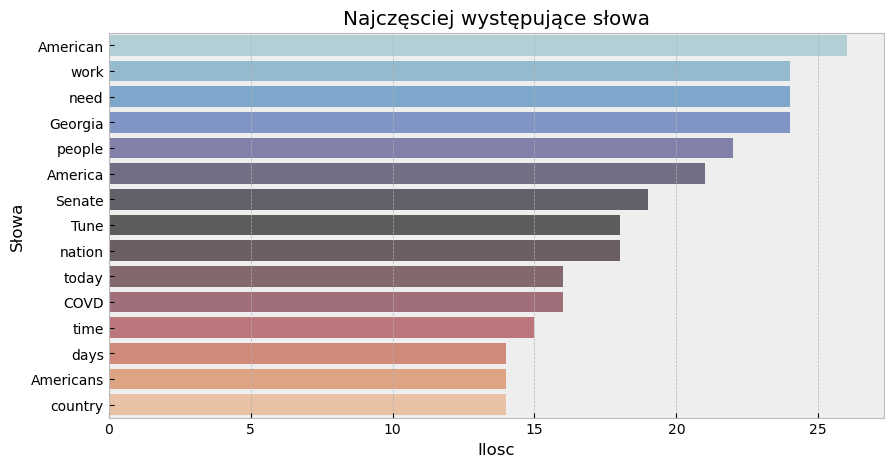

In [22]:
df = df[:15,]
plt.figure(figsize=(10,5))
sns.barplot(x=df.values, y=df.index, alpha=0.7, palette = 'icefire')
plt.title('Najczęsciej występujące słowa')
plt.ylabel('Słowa', fontsize=12)
plt.xlabel('Ilosc', fontsize=12)
plt.show()

Poniżej przedstawiono wykres, przedstawiający jak często występowały organizację w twittach związanych z Joe Biden'em. Z pomocą pakiety "spacy" starano się wyszukać w analizowanym tekście nazwy organizacji, co nie zawsze wychodziło z dobrym skutkiem. Zastosowana metoda okazała się nie być doskonała.

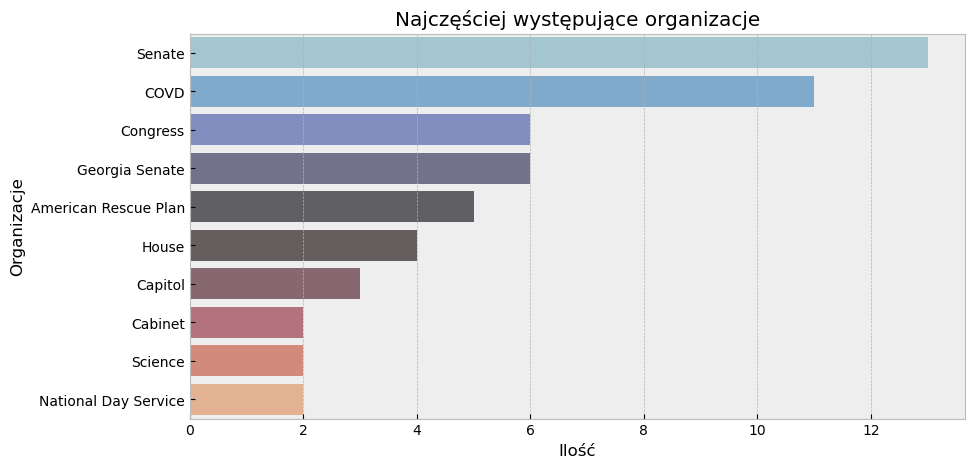

In [23]:
str1 = " " 
stem2 = str1.join(list_of_tweets_2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
org1 = pd.DataFrame(label, columns = ['Word','Entity'])
org2 = org1.where(org1['Entity'] == 'ORG')
org2 = org2['Word'].value_counts()
organisations = org2[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x=organisations.values, y=organisations.index, alpha=0.7, palette = 'icefire')
plt.title('Najczęściej występujące organizacje')
plt.ylabel('Organizacje', fontsize=12)
plt.xlabel('Ilość', fontsize=12)
plt.show()

Ostatni z wykresów przedstawiono osoby, które najczęściej pojawiały się w twittach związanych z Joe Biden'em. Tutaj sytuacja wygląda troche lepiej niż w przypadku organizacji, gdyż w lepszy sposób udało się wyznaczyć nazwy osób.

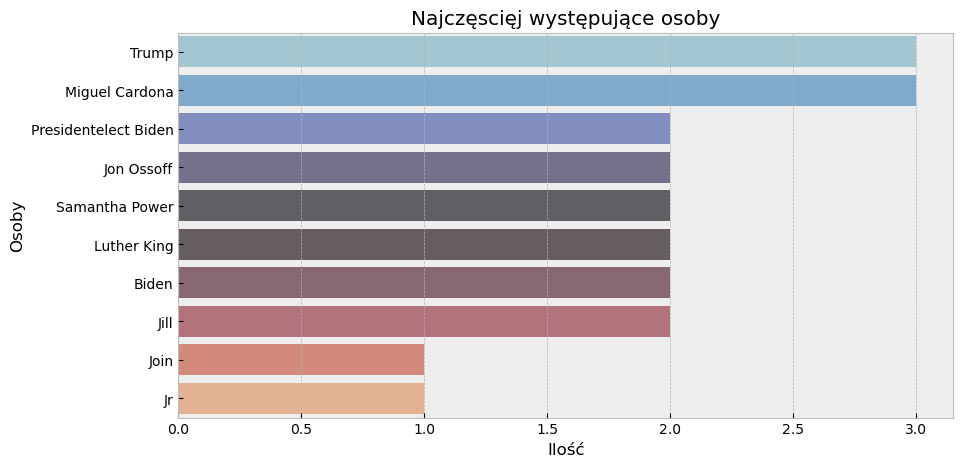

In [24]:
string1 = " " 
stem2 = string1.join(list_of_tweets_2)
stem2 = nlp(stem2)
label = [(X.text, X.label_) for X in stem2.ents]
people = pd.DataFrame(label, columns = ['Word','Entity'])
people = people.where(people['Entity'] == 'PERSON')
people1 = people['Word'].value_counts()
people = people1[:10,]
plt.figure(figsize=(10,5))
sns.barplot(x=people.values, y=people.index, alpha=0.7, palette = 'icefire')
plt.title('Najczęscięj występujące osoby')
plt.ylabel('Osoby', fontsize=12)
plt.xlabel('Ilość', fontsize=12)
plt.show()

# Podsumowanie

Pakiet "tweepy" pozwala na szybką konfigurację połączenia API, dzięki któremu w prosty sposób możemy pozyskać dane tesktowe do analizy. Po ich oczyszczeniu oraz odpowiednim przygotowaniu, możemy je wizualizować na wiele sposób. W powyższym projekcie starano się pokazać  najprostsze metody, jednak możliwości w tym zakresie zdają się być bardzo duże.